In [3]:
from qiskit import *

In [5]:
import sympy
import numpy as np

from qiskit.visualization.dag_visualization import dag_drawer

In [6]:
qr = QuantumRegister(2, 'qr')
cr = ClassicalRegister(2, 'cr')
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[1], qr[0])
qc.u1(2*sympy.pi, qr[0])  # TODO: this identity should be removed (but is not)
qc.cx(qr[1], qr[0])
qc.u1(sympy.pi/2, qr[0])  # these three should combine
qc.u1(sympy.pi, qr[0])    # to identity then
qc.u1(sympy.pi/2, qr[0])  # optimized away.
qc.cx(qr[1], qr[0])
qc.u1(np.pi, qr[1])  # this doesn't become precisely 0, so should
qc.u1(np.pi, qr[1])  # combine but stay, until an approximate optimizer.
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw()


In [11]:
from qiskit.dagcircuit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit import mapper

In [12]:
dag = circuit_to_dag(qc)

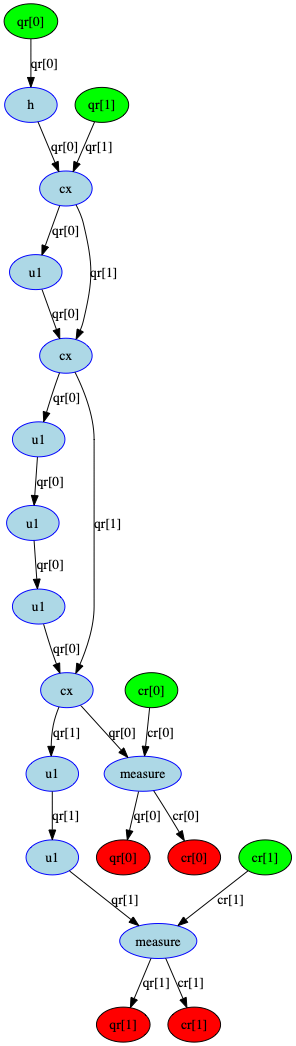

In [13]:
dag_drawer(dag)